# Seaborn


### Objectives
After this lesson you should be able to ...
1. Know that Seaborn is a wrapper for matplotlib and makes beautiful plots
2. Integrates directly with pandas DataFrames


### Prepare for this lesson by...
1. http://seaborn.pydata.org/tutorial.html

### Introduction
The basics of matplotlib are good to know. It is still the most popular and a very powerful plotting library that will continue to be used for some time into the future. 

Plotting in matplotlib is not easy - not in the beginning at least. Pandas has produced a nice wrapper for matplotlib. But [Seaborn](http://seaborn.pydata.org/index.html) has gone even further and has many wonderful and easy to use plotting functions. It is built directly on top of matplotlib and integrates directly with the pandas DataFrame.

### Instant awesomeness with Seaborn

Just importing the library into the namespace will change the plot styling

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

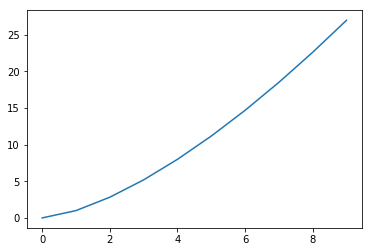

In [2]:
# no seaborn import. defaults extremely ugly
plt.plot(np.arange(10)**1.5)

In [3]:
# just importing seaborn changes the style
import seaborn as sns

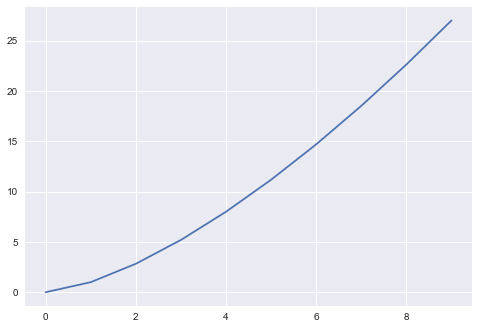

In [4]:
plt.plot(np.arange(10)**1.5)

### College Admissions Data with Seaborn
Seaborn is specifically designed to plot data from pandas DataFrames.

In [5]:
college = pd.read_csv('data/college.csv')
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


### Scatter Plots: Matplotlib vs Seaborn
Seaborn was obviously built to be better at default plotting than matplotlib. See the difference between seaborn's and matplotlib's scatter plot. Seaborn's comes with a free histogram on top and side.

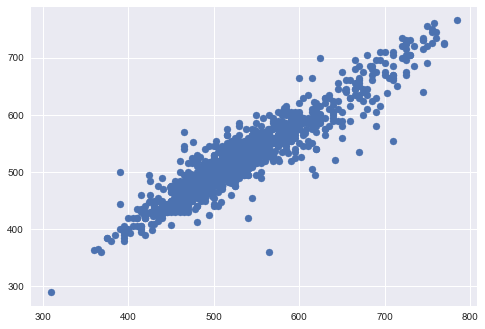

In [6]:
plt.scatter('SATMTMID', 'SATVRMID', data=college)

Just pass the dataframe to seaborn and you can use the column names directly

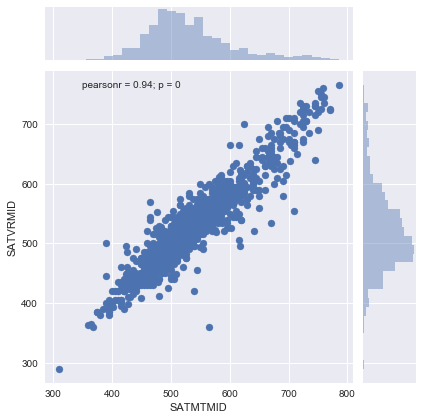

In [7]:
jg = sns.jointplot('SATMTMID', 'SATVRMID', data=college)

In [17]:
# get only 8 states
states = np.random.choice(college.STABBR.unique(), 8, replace=False)
college_8 = college[college['STABBR'].isin(states)]

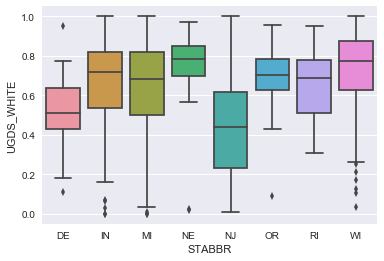

In [18]:
sns.boxplot('STABBR', 'UGDS_WHITE', data=college_8)

### Histograms in Seaborn

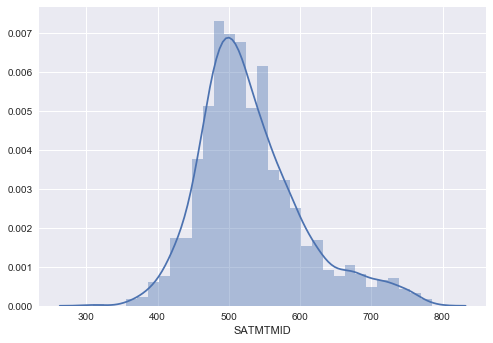

In [10]:
sns.distplot(college.SATMTMID.dropna())

### Two broad classes of Seaborn plots

Seaborn plots fall into two broad classes. Those that return a matplotlib axes (these are the lighter functions and easier to manuever) and those that return some kind of Grid object. These Grid objects are unique constructs to Seaborn and are at a higher level than matplotlib figures. Each grid will contain a figure which contains an axes.

Those functions that return an axes can be embedded directly in matplotlib figures easily.

### Add seaborn plots to existing matplotlib figures
Many seaborn plotting functions will have an **`ax`** parameter than you can use to pass a matplotlib axes - the plotting area where you want the plot to show up. Some seaborn functions return are entire matplotlib figures themselves and thus cannot be added to matplotlib subplots.

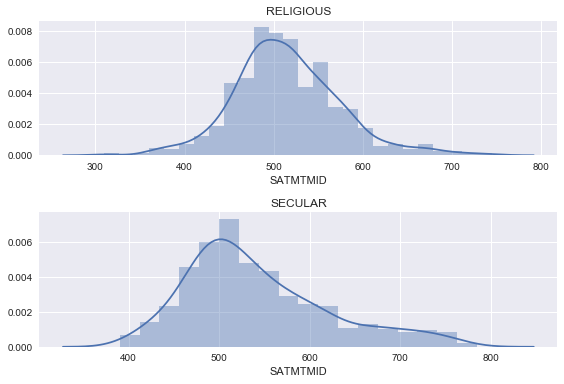

In [11]:
# create a figure with 3 axes
fig, (ax1, ax2) = plt.subplots(2, 1)

sns.distplot(college.query('RELAFFIL == 1').SATMTMID.dropna(), ax=ax1)
sns.distplot(college.query('RELAFFIL == 0').SATMTMID.dropna(), ax=ax2)

ax1.set_title('RELIGIOUS')
ax2.set_title('SECULAR')
plt.tight_layout()

### Be careful about the axis
The above plot looks like there is a substantial difference between religiously affiliated schools and those that are not. But looking at x-axis, we can see that they are not aligned.

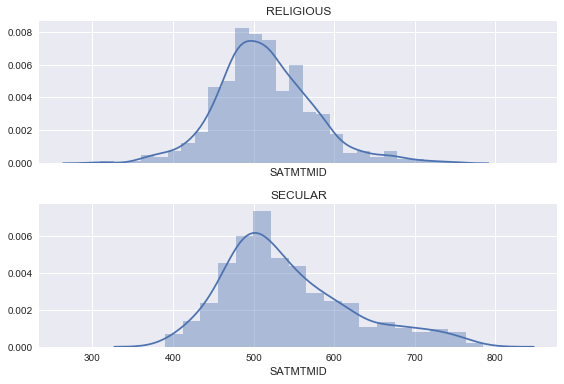

In [12]:
# create a figure with 3 axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.distplot(college.query('RELAFFIL == 1').SATMTMID.dropna(), ax=ax1)
sns.distplot(college.query('RELAFFIL == 0').SATMTMID.dropna(), ax=ax2)

ax1.set_title('RELIGIOUS')
ax2.set_title('SECULAR')
plt.tight_layout()

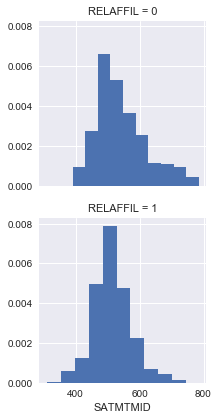

In [13]:
g = sns.FacetGrid(college, row='RELAFFIL')
g = g.map(plt.hist, "SATMTMID", normed=True).add_legend()

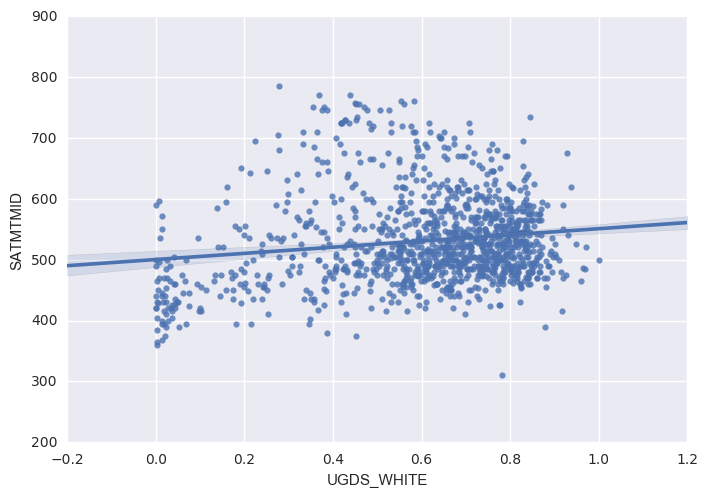

In [34]:
sns.regplot('UGDS_WHITE', 'SATMTMID', data=college, )

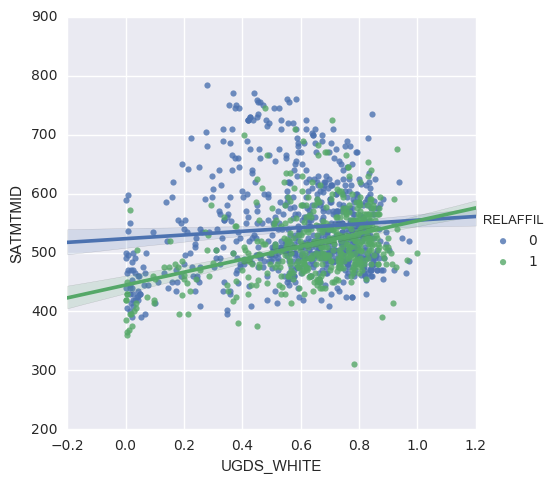

In [37]:
sns.lmplot('UGDS_WHITE', 'SATMTMID', data=college, hue='RELAFFIL')

# Problem Set

### Problem 1
<span  style="color:green; font-size:16px">Plot a horizontal bar plot of total count of each diamond cut with seaborn and add a different column as the 'hue'. Look at the [plotting with categories](http://seaborn.pydata.org/tutorial/categorical.html) section of the seaborn docs</span>

In [45]:
# your code here

### Problem 2
<span  style="color:green; font-size:16px">Use seaborn to plot a regression between carat and price. Make a different regression line for each clarity.</span>

In [ ]:
# your code here

### Problem 3
<span  style="color:green; font-size:16px">Use city of Houston data. Look up how to do a factor plot in seaborn and create a new graph for each POSITION TITLE that has more than 50 occurrences. Then find the mean salary between male and female for every race. Scroll down to the [bottom of this page to see an example](http://seaborn.pydata.org/tutorial/categorical.html). </span>

In [ ]:
# your code here

### Problem 4
<span  style="color:green; font-size:16px">Use the college scoreboard dataset to create a pair plot from 5 of the numeric variables. Choose color based on the school's religious affiliation. Use the **`plot_kws`** argument to change some of the matplotlib [plotting arguments](http://matplotlib.org/api/lines_api.html).</span>

In [ ]:
# your code here

### Problem 5
<span  style="color:green; font-size:16px">Create a matplotlib figure with a 2 by 1 subplot axes. In the top axes using seaborn, plot the top states total student population. On the bottom, plot the lowest 10 states by student population.</span>

In [ ]:
# your code here

### Problem 6
<span  style="color:green; font-size:16px">Visually test whether a relationship exists between total SAT score and median earnings 10 years after enrollment (MD_EARN_WNE_P10)</span>

In [20]:
# your code here

### Problem 7
<span  style="color:green; font-size:16px">Visually test whether a relationship exists between number of characters in institution name and the percent of students above 25 years of age.</span>

In [21]:
# your code here

### Problem 8
<span  style="color:green; font-size:16px">Use **`pd.cut`** to create 4 categorical variables for the column median debt of completers. Use a FacetGrid to create a box plot of SAT math scores for each category. Once you have done this, add a hue based on religious affiliation.</span>

In [ ]:
# your code here